In [78]:
import pandas as pd
import numpy as np
import random

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Name': ['Name' + str(i) for i in range(1, 5001)],
    'Age': np.random.randint(18, 60, 5000),
    'Gender': random.choices(['Male', 'Female'], k=5000),
    'Test 1': np.random.randint(60, 100, 5000),
    'Test 2': np.random.randint(60, 100, 5000),
    'Test 3': np.random.randint(60, 100, 5000),
    'Height': np.random.randint(150, 200, 5000),
    'Weight': np.random.randint(50, 100, 5000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Insert some missing values
for col in 'Test 1', 'Test 2', 'Test 3', 'Height', 'Weight':
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Save the DataFrame to a CSV file
df.to_csv('synthetic_data.csv', index=False)

print(df.head())


    Name  Age  Gender  Test 1  Test 2  Test 3  Height  Weight
0  Name1   56    Male     NaN    98.0    81.0     NaN    54.0
1  Name2   46    Male     NaN    91.0    98.0   185.0    51.0
2  Name3   32    Male    95.0    77.0    82.0   154.0    95.0
3  Name4   25    Male    94.0    76.0    89.0   188.0    73.0
4  Name5   38  Female    91.0    93.0     NaN   155.0    67.0


## Question 1

In [79]:
Synthetic_data=pd.read_csv("synthetic_data.csv")

In [80]:
Synthetic_data.head(10)

,Name,Age,Gender,Test 1,Test 2,Test 3,Height,Weight
0,Name1,56,Male,NaN,98.0,81.0,NaN,54.0
1,Name2,46,Male,NaN,91.0,98.0,185.0,51.0
2,Name3,32,Male,95.0,77.0,82.0,154.0,95.0
3,Name4,25,Male,94.0,76.0,89.0,188.0,73.0
4,Name5,38,Female,91.0,93.0,NaN,155.0,67.0
5,Name6,56,Female,99.0,98.0,77.0,194.0,76.0
6,Name7,36,Female,83.0,66.0,69.0,185.0,73.0
7,Name8,40,Male,76.0,94.0,98.0,194.0,78.0
8,Name9,28,Male,NaN,89.0,89.0,153.0,60.0
9,Name10,28,Male,NaN,71.0,85.0,159.0,97.0


## Question 2

In [81]:
Synthetic_data.isnull().sum()

Name        0
Age         0
Gender      0
Test 1    500
Test 2    500
Test 3    500
Height    500
Weight    500
dtype: int64

## Question 3

In [82]:
Synthetic_data["Test 1"]=Synthetic_data["Test 1"].fillna(Synthetic_data["Test 1"].mean())

In [83]:
Synthetic_data["Test 2"]=Synthetic_data["Test 2"].fillna(Synthetic_data["Test 2"].mean())

In [84]:
Synthetic_data["Test 3"]=Synthetic_data["Test 3"].fillna(Synthetic_data["Test 3"].mean())

In [85]:
Synthetic_data["Height"]=Synthetic_data["Height"].fillna(Synthetic_data["Height"].mean())

In [86]:
Synthetic_data["Weight"]=Synthetic_data["Weight"].fillna(Synthetic_data["Weight"].mean())

In [87]:
Synthetic_data.isnull().sum()

Name      0
Age       0
Gender    0
Test 1    0
Test 2    0
Test 3    0
Height    0
Weight    0
dtype: int64

## Question 4

In [88]:
Synthetic_data["Average"]=(Synthetic_data["Test 1"]+Synthetic_data["Test 2"]+Synthetic_data["Test 3"])/3

In [89]:
Synthetic_data

,Name,Age,Gender,Test 1,Test 2,Test 3,Height,Weight,Average
0,Name1,56,Male,79.33,98.000000,81.000000,174.836889,54.0,86.110000
1,Name2,46,Male,79.33,91.000000,98.000000,185.000000,51.0,89.443333
2,Name3,32,Male,95.00,77.000000,82.000000,154.000000,95.0,84.666667
3,Name4,25,Male,94.00,76.000000,89.000000,188.000000,73.0,86.333333
4,Name5,38,Female,91.00,93.000000,79.104222,155.000000,67.0,87.701407
...,...,...,...,...,...,...,...,...,...
4995,Name4996,32,Male,84.00,96.000000,83.000000,166.000000,60.0,87.666667
4996,Name4997,36,Female,90.00,79.543111,97.000000,159.000000,64.0,88.847704
4997,Name4998,52,Male,96.00,99.000000,82.000000,153.000000,59.0,92.333333
4998,Name4999,34,Female,61.00,66.000000,64.000000,172.000000,91.0,63.666667


## Question 5

In [90]:
Synthetic_data["Gender"].value_counts()

Gender
Female    2505
Male      2495
Name: count, dtype: int64

## Question 6

In [91]:
pd.pivot_table(data=Synthetic_data,values="Age",index="Gender")

,Age
Gender,
Female,38.684232
Male,38.640080


## Question 7

In [92]:
Synthetic_data["Average"].sort_values().tail(10)

3368    96.000000
4540    96.333333
745     96.333333
3636    96.666667
1177    96.666667
4105    96.666667
371     96.666667
157     97.333333
3152    97.333333
4762    98.000000
Name: Average, dtype: float64

## Question 8

In [93]:
import seaborn as sns

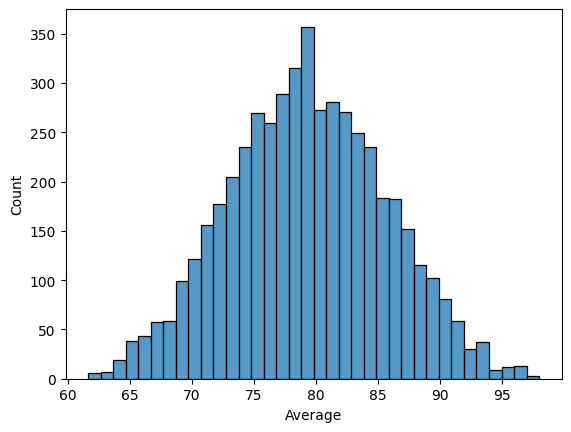

In [94]:
sns.histplot(data=Synthetic_data,x="Average");

## Question 9

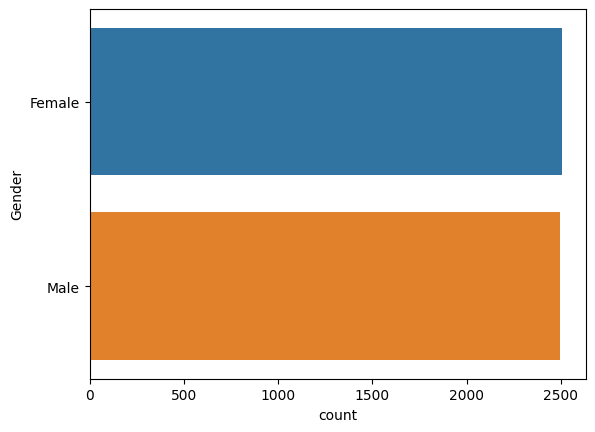

In [95]:
sns.barplot(x=Synthetic_data["Gender"].value_counts(),y=Synthetic_data["Gender"].value_counts().index);

## Question 10

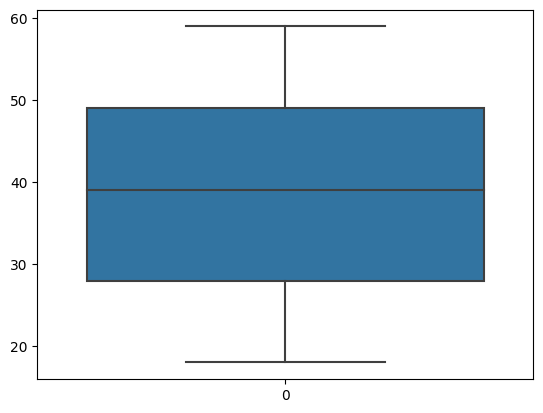

In [96]:
sns.boxplot(Synthetic_data["Age"]);

## Question 11

In [97]:
y=pd.pivot_table(data=Synthetic_data,index="Gender",values=("Test 1","Test 2","Test 3"))

In [98]:
y

,Test 1,Test 2,Test 3
Gender,,,
Female,79.398339,79.621320,79.046662
Male,79.261387,79.464589,79.162013


In [99]:
import matplotlib.pyplot as plt

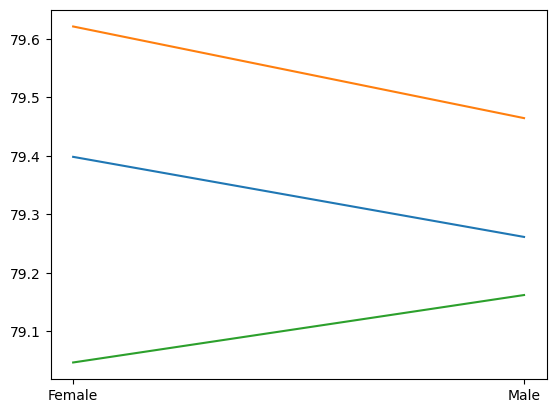

In [100]:
plt.plot(y);

## Question 12

In [101]:
Synthetic_data.to_csv('new_synthetic_data.csv',index=False)

## Question 13

In [102]:
names = ['Alice', 'Bob', 'Charlie', 'David']
ages = [25, 30, 35, 40]

In [103]:
list_to_Dataframe=pd.DataFrame([names,ages])

In [104]:
list_to_Dataframe

,0,1,2,3
0,Alice,Bob,Charlie,David
1,25,30,35,40


## Question 14

In [105]:
squares = [x**2 for x in range(1, 21) if x % 2 == 0]
print(squares)

[4, 16, 36, 64, 100, 144, 196, 256, 324, 400]


## Question 15

In [106]:
odd_numbers = list(filter(lambda x: x % 2 != 0, range(1, 51)))
print(odd_numbers)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


## Question 16

In [107]:
for i in range(1, 6):
     print("*" * i)

*
**
***
****
*****
